In [25]:
# Importing Statements
%matplotlib inline
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
import numpy as np

In [34]:
# read the file
data = pd.read_csv('data.csv')

In [35]:
# # Checking the data set
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


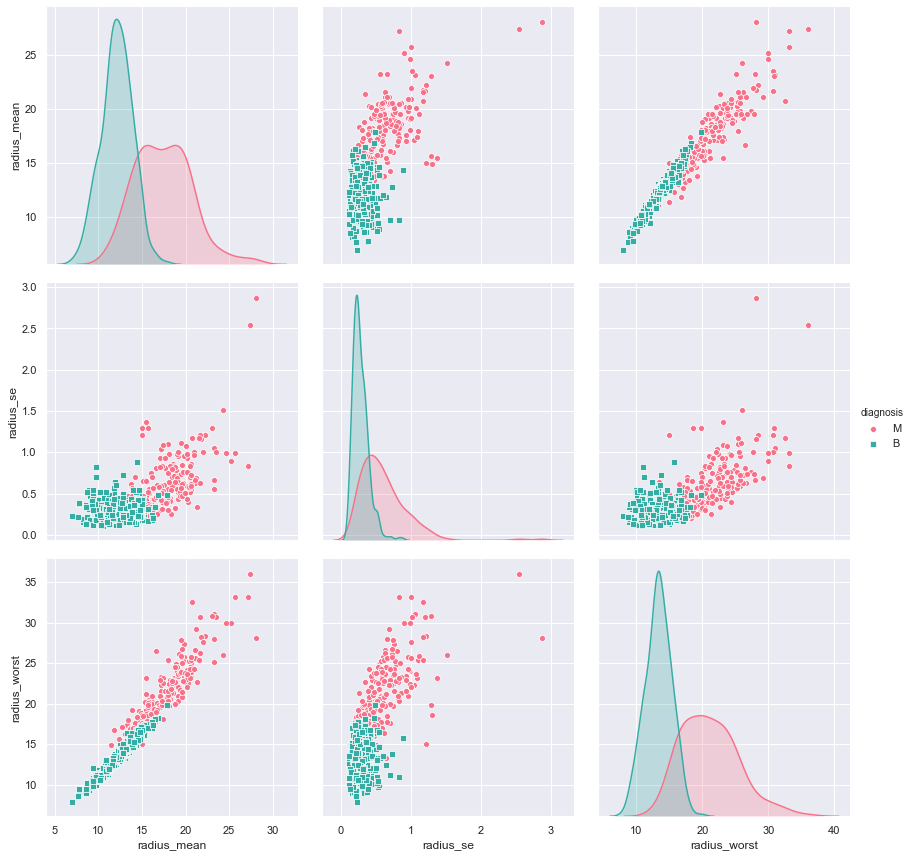

In [36]:
radius = data[['radius_mean','radius_se','radius_worst','diagnosis']]
sns.pairplot(radius, hue='diagnosis',palette="husl", markers=["o", "s"],size=4)

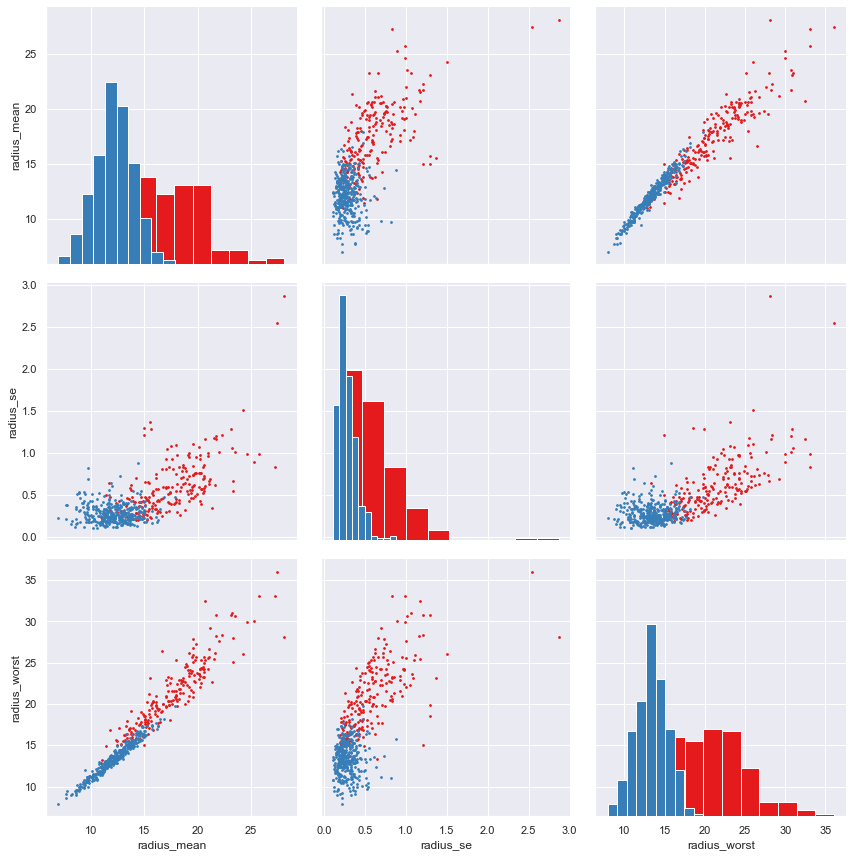

In [37]:

g = sns.PairGrid(radius,hue='diagnosis', palette="Set1",size=4)
g = g.map_diag(plt.hist)
g = g.map_offdiag(plt.scatter, s = 3)

IndexError: index 15 is out of bounds for axis 0 with size 15

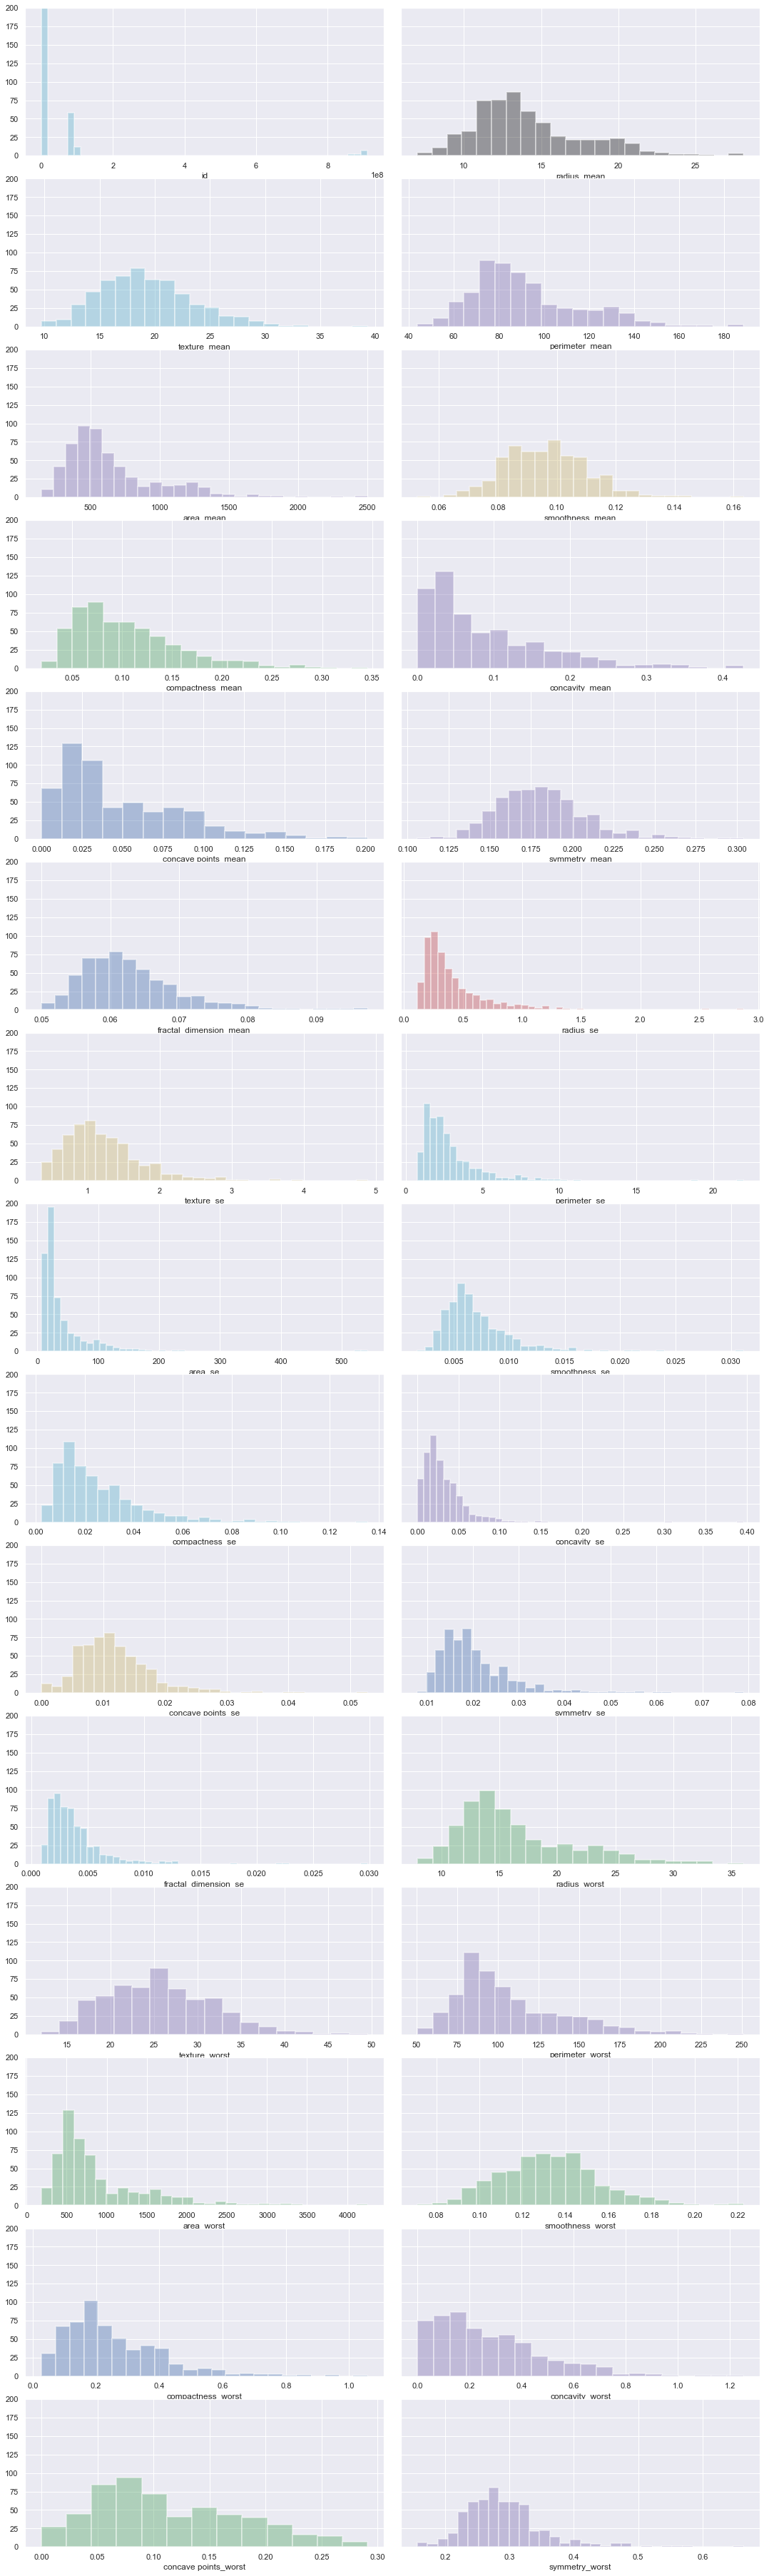

In [38]:
end = data['diagnosis']
data.drop(labels=['diagnosis'], axis=1,inplace = True)
data.insert(30, 'diagnosis', end)
data.head()

def categorical_to_numeric_diagnosis(x):
    if x=='M':
        return 1
    if x=='B':
        return 0

data['diagnosis']= data['diagnosis'].apply(categorical_to_numeric_diagnosis)
data["diagnosis"].value_counts()


colors = np.array('b g r c m y k'.split()) #Different colors for plotting

fig,axes = plt.subplots(nrows =15,ncols=2, sharey=True,figsize = (15,50))
plt.tight_layout()
row = 0
iteration = 0
for j in range(0,len(data.columns[:-1])):
    iteration+=1
    if(j%2==0):
        k = 0
    else:
        k = 1
    sns.distplot(data[data.columns[j]],kde=False,hist_kws=dict(edgecolor="w", linewidth=2),color = np.random.choice(colors) ,ax=axes[row][k])
    if(iteration%2==0):
        row+=1
        plt.ylim(0,200)


In [39]:

#The features looks like they are broken into three main categories, value means, standard deivations, and 'worst'. We can check to see if there are any correlations between these subsets of features
features_mean = data.columns[1:9]
features_se = data.columns[9:19]
features_worst = data.columns[1]

In [40]:

# Separate out malignant and benign data for graphing
malignant = data[data['diagnosis'] ==1]
benign = data[data['diagnosis'] ==0]

In [41]:
# Column names to observe in following graphs - mean values only
observe = list(data.columns[1:11]) + ['area_worst'] + ['perimeter_worst']
observables = data.loc[:,observe]

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  if __name__ == '__main__':


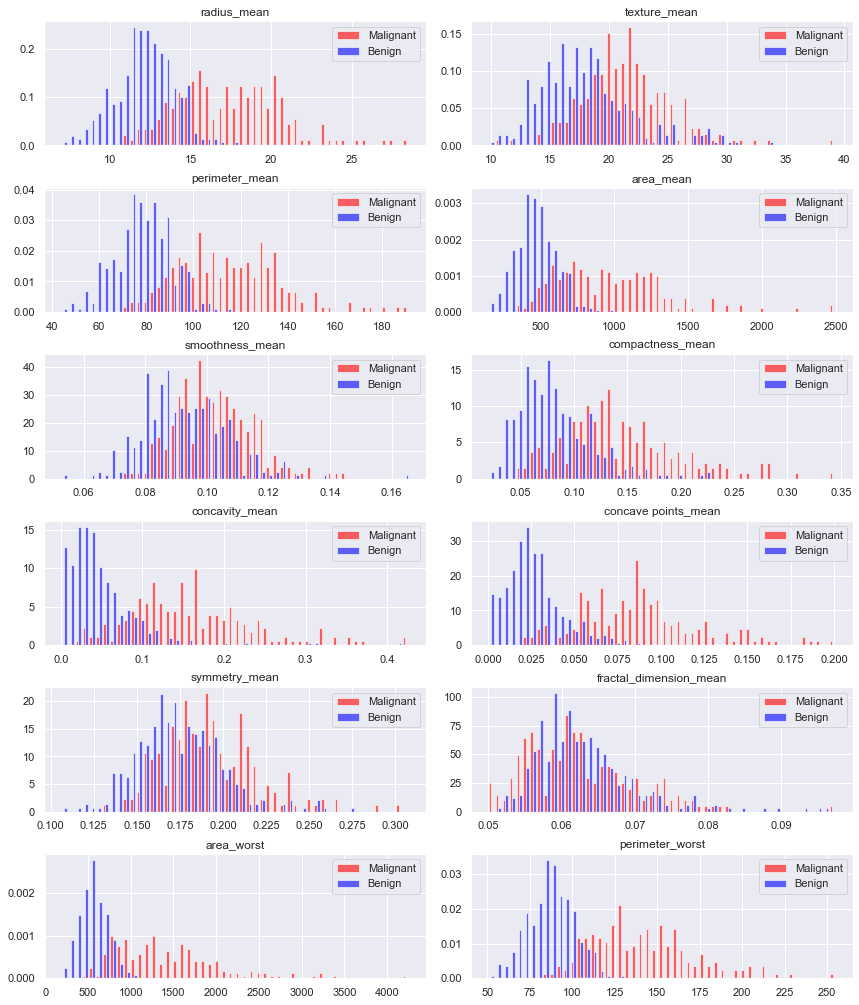

In [42]:
plt.rcParams.update({'font.size': 8})
plot, graphs = plt.subplots(nrows=6, ncols=2, figsize=(12,14))
graphs = graphs.flatten()
for idx, graph in enumerate(graphs):
    graph.figure
    
    binwidth= (max(data[observe[idx]]) - min(data[observe[idx]]))/50
    bins = np.arange(min(data[observe[idx]]), max(data[observe[idx]]) + binwidth, binwidth)
    graph.hist([malignant[observe[idx]],benign[observe[idx]]], bins=bins, alpha=0.6, normed=True, label=['Malignant','Benign'], color=['red','blue'])
    graph.legend(loc='upper right')
    graph.set_title(observe[idx])
plt.tight_layout()

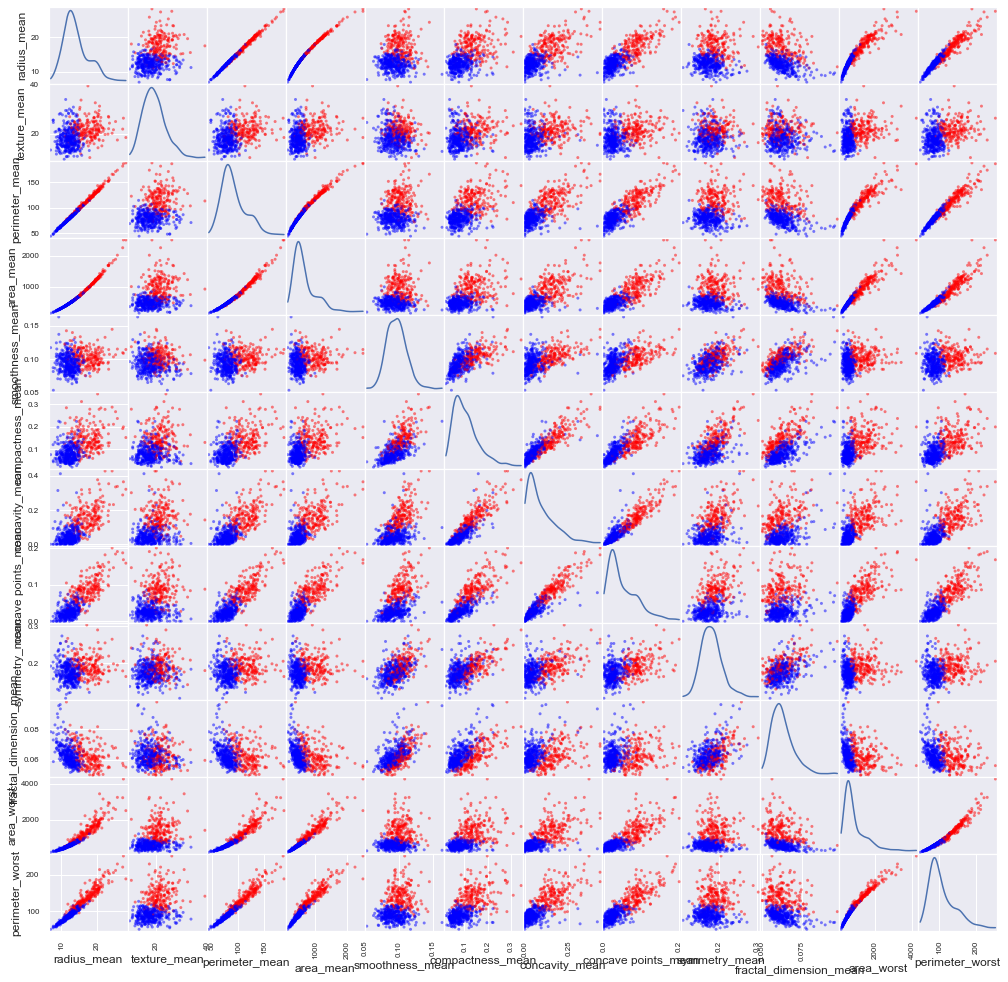

In [43]:
color_wheel = {0: "blue", 1: "red"}
colors = data["diagnosis"].map(lambda x: color_wheel.get(x))
pd.plotting.scatter_matrix(observables, c=colors, alpha = 0.5, figsize = (17, 17), diagonal = 'kde');

In [ ]:

# Setting ploting size
sns.set(rc = {"figure.figsize": (8, 6)})
print(data.groupby('diagnosis').size())
sns.countplot(data['diagnosis'],label="count")
plt.show()

In [ ]:
diagnosis_all = list(data.shape)[0]
diagnosis_categories = list(data['diagnosis'].value_counts())

print("\n \t The data has {} diagnosis, {} malignant and {} benign.".format(diagnosis_all, 
                                                                                 diagnosis_categories[0], 
                                                                                 diagnosis_categories[1]))

In [ ]:

#split our data into train and test
traindf, testdf = train_test_split(data, test_size = 0.3)
labels = 'Train', 'Test'
plt.pie([70, 30], labels=labels, autopct='%1.1f%%', shadow=True)
plt.show()
print("Train set", traindf.shape)
print("Test set", testdf.shape)

In [ ]:
#split our data into train and test
traindf, testdf = train_test_split(data, test_size = 0.3)
print("Train set", traindf.shape)
print("Test set", testdf.shape)

In [ ]:

features_mean= list(data.columns[1:11])
corr = data[features_mean].corr() # .corr is used for find corelation
plt.figure(figsize=(14,14))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 15},
           xticklabels= features_mean, yticklabels= features_mean,
           cmap= 'coolwarm') 
plt.show()

# Observation
the radius, parameter and area are highly correlated as expected from their relation so from these we will use anyone of them
compactness_mean, concavity_mean and concavepoint_mean are highly correlated so we will use compactness_mean from here
so selected Parameter for use is perimeter_mean, texture_mean, compactness_mean, symmetry_mean

# Model Clustering

In [ ]:
#Generic function for making a classification model and accessing the performance. 
Y = data['diagnosis'].values
X = data.drop('diagnosis', axis=1).values
X_train, X_test, Y_train, Y_test = train_test_split (X, Y, test_size = 0.30, random_state=21)

# Visualization using Diffrent plots
1. Boxplot for all Mean values vs Diagnosis

In [ ]:
# All Mean vs Diagnosis
fig, (axis1,axis2,axis3, axis4, axis5) = plt.subplots(1,5,figsize=(16,11))

sns.boxplot(x="diagnosis", y="radius_mean", data=data, ax=axis1)
axis1.set_title("diagnosis vs radius_mean")

sns.boxplot(x="diagnosis", y="area_mean", data=data, ax=axis2)
axis2.set_title("diagnosis vs area_mean")

sns.boxplot(x="diagnosis", y="smoothness_mean", data=data, ax=axis3)
axis3.set_title("diagnosis vs smoothness_mean")

sns.boxplot(x="diagnosis", y="compactness_mean", data=data, ax=axis4)
axis4.set_title("diagnosis vs compactness_mean")

sns.boxplot(x="diagnosis", y="texture_mean", data=data, ax=axis5)
axis5.set_title("diagnosis vs texture_mean")
#==============================================================================================================================
fig, (axis1,axis2,axis3, axis4, axis5) = plt.subplots(1,5,figsize=(16,11))

sns.boxplot(x="diagnosis", y="perimeter_mean", data=data, ax=axis1)
axis1.set_title("diagnosis vs perimeter_mean")

sns.boxplot(x="diagnosis", y="compactness_mean", data=data, ax=axis2)
axis2.set_title("diagnosis vs compsctness_mean")

sns.boxplot(x="diagnosis", y="concave points_mean", data=data, ax=axis3)
axis3.set_title("diagnosis vs concave points_mean")

sns.boxplot(x="diagnosis", y="concavity_mean", data=data, ax=axis4)
axis4.set_title("diagnosis vs concavity_mean")

sns.boxplot(x="diagnosis", y="fractal_dimension_mean", data=data, ax=axis5, )
axis5.set_title("diagnosis vs fractal_dimension_mean")

# Swarmplot for all Worst values vs Diagnosis

In [ ]:
# All Worst vs Diagnosis
fig, (axis1,axis2,axis3, axis4, axis5) = plt.subplots(1,5,figsize=(16,10))

sns.swarmplot(x="diagnosis", y="radius_worst", data=data, ax=axis1, palette="Set3")
axis1.set_title("diagnosis vs radius_worst")

sns.swarmplot(x="diagnosis", y="area_worst", data=data, ax=axis2, palette="Set3")
axis2.set_title("diagnosis vs area_worst")

sns.swarmplot(x="diagnosis", y="smoothness_worst", data=data, ax=axis3, palette="Set3")
axis3.set_title("diagnosis vs smoothness_worst")

sns.swarmplot(x="diagnosis", y="compactness_worst", data=data, ax=axis4, palette="Set3")
axis4.set_title("diagnosis vs compactness_worst")

sns.swarmplot(x="diagnosis", y="texture_worst", data=data, ax=axis5, palette="Set3")
axis5.set_title("diagnosis vs texture_worst")
#==============================================================================================================================
fig, (axis1,axis2,axis3, axis4, axis5) = plt.subplots(1,5,figsize=(16,10))

sns.swarmplot(x="diagnosis", y="perimeter_worst", data=data, ax=axis1, palette="Set3")
axis1.set_title("diagnosis vs perimeter_worst")

sns.swarmplot(x="diagnosis", y="compactness_worst", data=data, ax=axis2, palette="Set3")
axis2.set_title("diagnosis vs compsctness_worst")

sns.swarmplot(x="diagnosis", y="concave points_worst", data=data, ax=axis3, palette="Set3")
axis3.set_title("diagnosis vs concave points_worst")

sns.swarmplot(x="diagnosis", y="concavity_worst", data=data, ax=axis4, palette="Set3")
axis4.set_title("diagnosis vs concavity_worst")

sns.swarmplot(x="diagnosis", y="fractal_dimension_worst", data=data, ax=axis5, palette="Set3")
axis5.set_title("diagnosis vs fractal_dimension_worst")

# Trainning

In [ ]:
features_mean= list(data.columns[1:11])

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score

import time

In [ ]:
diag_map = {'M':1, 'B':0}
data['diagnosis'] = data['diagnosis'].map(diag_map)

In [ ]:
X = data.loc[:,features_mean]
y = data.loc[:, 'diagnosis']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

accuracy_all = []
cvs_all = []

After training our machine learning algorithm we need to test its accuracy

# Forest and Tree Methods

the classifier clf is initialized;
the classifier clf is fitted with the train data set X_train and y_train;
the predictions are found using X_test;
the accuracy is estimated with help of cross-validation;
the accuracy of the predictions is measured.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier

start = time.time()

clf = RandomForestClassifier()
clf.fit(X_train, y_train)
prediction = clf.predict(X_test)
scores = cross_val_score(clf, X, y, cv=5)

end = time.time()

accuracy_all.append(accuracy_score(prediction, y_test))
cvs_all.append(np.mean(scores))

print("Random Forest Accuracy: {0:.2%}".format(accuracy_score(prediction, y_test)))
print("Cross validation score: {0:.2%} (+/- {1:.2%})".format(np.mean(scores), np.std(scores)*2))
print("Execution time: {0:.5} seconds \n".format(end-start))

start = time.time()

clf = ExtraTreesClassifier()
clf.fit(X_train, y_train)
prediction = clf.predict(X_test)
scores = cross_val_score(clf, X, y, cv=5)

end = time.time()

accuracy_all.append(accuracy_score(prediction, y_test))
cvs_all.append(np.mean(scores))

print("Extra Trees Accuracy: {0:.2%}".format(accuracy_score(prediction, y_test)))
print("Cross validation score: {0:.2%} (+/- {1:.2%})".format(np.mean(scores), np.std(scores)*2))
print("Execution time: {0:.5} seconds \n".format(end-start))

start = time.time()

clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
prediction = clf.predict(X_test)
scores = cross_val_score(clf, X, y, cv=5)

end = time.time()

accuracy_all.append(accuracy_score(prediction, y_test))
cvs_all.append(np.mean(scores))

print("Dedicion Tree Accuracy: {0:.2%}".format(accuracy_score(prediction, y_test)))
print("Cross validation score: {0:.2%} (+/- {1:.2%})".format(np.mean(scores), np.std(scores)*2))
print("Execution time: {0:.5} seconds \n".format(end-start))

In [ ]:
radius = data
[['radius_mean','radius_se','radius_worst','diagnosis']]
sns.pairplot(radius, hue='diagnosis',palette="husl", markers=["o", "s"],size=4)